Pull data from  https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M using the Beautiful Soup python library.

In [4]:
import pandas as pd

import requests

from bs4 import BeautifulSoup

req = requests.get("https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050")

soup = BeautifulSoup(req.content,'lxml')

table = soup.find_all('table')[0]

df = pd.read_html(str(table))

neighbourhood=pd.DataFrame(df[0])

In [5]:
neighbourhood.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [6]:
#Remove cells with Borough not assigned
neighbourhood2 = neighbourhood[neighbourhood.Borough != 'Not assigned']
#Check for cells with Neighbourhood not assigned
neighbourhood2[(neighbourhood2['Neighbourhood'] == 'Not assigned') & (neighbourhood2['Borough'] != 'Not assigned')].count()
neighbourhood3=neighbourhood2.drop(['Postcode'], axis=1)
neighbourhood3.head()


,Borough,Neighbourhood
2,North York,Parkwoods
3,North York,Victoria Village
4,Downtown Toronto,Harbourfront
5,North York,Lawrence Heights
6,North York,Lawrence Manor


In [7]:
#Import csv file with coordinates
new = pd.read_csv("https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/a083c865-6d60-4d1d-b6c6-b0c8a85f9c15?format=csv&projection=4326")
new.head()

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,4341,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),NaN,NaN,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,4342,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),NaN,NaN,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
2,4343,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),NaN,NaN,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,4344,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),NaN,NaN,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
4,4345,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),NaN,NaN,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"{u'type': u'Polygon', u'coordinates': (((-79.4..."


In [8]:
new2 = new[['AREA_SHORT_CODE','AREA_NAME','LONGITUDE','LATITUDE']]
new3 = new2.rename(columns = {'AREA_SHORT_CODE':'Neighbourhood Number','AREA_Name':'Neighbourhood'})
new3.head()

,Neighbourhood Number,AREA_NAME,LONGITUDE,LATITUDE
0,94,Wychwood (94),-79.425515,43.676919
1,100,Yonge-Eglinton (100),-79.403590,43.704689
2,97,Yonge-St.Clair (97),-79.397871,43.687859
3,27,York University Heights (27),-79.488883,43.765736
4,31,Yorkdale-Glen Park (31),-79.457108,43.714672


In [2]:

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

In [9]:
popul = pd.read_csv("https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/ef0239b1-832b-4d0b-a1f3-4153e53b189e?format=csv")
popul.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No 

In [10]:
popul2 = popul.drop(['_id','Topic','Data Source','City of Toronto','Category'], axis=1)
popul2 = popul2.rename(columns = {'Characteristic':'Neighbourhood'})
popul2.head()

,Neighbourhood,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Neighbourhood Number,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,TSNS2020 Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No Designation,NIA,No Designation,No Designation,Emerging Neighbourhood,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation

In [11]:
popul3 = popul2[popul2["Neighbourhood"].isin([" Caribbean origins", " Carib", " Caribbean origins; n.i.e.", " Jamaican","Neighbourhood Number" ])]
popul3.set_index('Neighbourhood',inplace=True)
popul3.head()

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
Neighbourhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Neighbourhood Number,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
Caribbean origins,"1,445","1,395",350,750,815,440,510,570,510,330,"1,400","1,680",840,"3,445",475,980,110,420,"3,045",395,710,245,970,940,"1,545",460,945,625,265,545,"1,005","1,830","1,600","3,830",500,960,525,"2,875","1,275","1,315",600,600,880,435,250,"4,815",630,605,605,505,705,"1,540",435,525,"1,320","2,065",645,"1,135","1,595",400,960,"1,415",695,"1,780",85,565,"2,635",355,260,295,290,420,510,"6,985",685,235,950,"1,275","2,280",945,"2,605","4,335",435,910,930,160,490,"1,365",390,715,925,"2,155","1,300",395,335,"2,710",855,165,570,165,505,"1,125","2,150",585,355,"6,280",185,"1,545","2,285","1,305","1,020",465,460,655,"1,580",820,510,855,535,320,155,"1,380","2,625","4,375","4,390",805,"3,550",850,"1,615",860,215,"1,415","4,665",585,460,740,280,295,"3,345",935
Carib,25,0,0,10,0,10,10,0,0,10,0,0,20,20,0,30,0,10,0,0,25,0,0,0,10,0,0,0,10,10,10,15,15,35,0,15,0,35,0,0,0,0,0,0,0,10,0,0,0,0,0,25,10

In [12]:
popul4 = popul3.T
popul4[' Caribbean origins']=popul4[' Caribbean origins'].replace(',', '', regex=True)
popul4[' Caribbean origins'] = popul4[' Caribbean origins'].astype(float)
popul4[' Carib']=popul4[' Carib'].replace(',', '', regex=True)
popul4[' Carib'] = popul4[' Carib'].astype(float)
popul4[' Caribbean origins; n.i.e.']=popul4[' Caribbean origins; n.i.e.'].replace(',', '', regex=True)
popul4[' Caribbean origins; n.i.e.'] = popul4[' Caribbean origins; n.i.e.'].astype(float)
popul4[' Jamaican']=popul4[' Jamaican'].replace(',', '', regex=True)
popul4[' Jamaican'] = popul4[' Jamaican'].astype(float)
popul4['Total'] = popul4.sum(axis=1)
popul4['Percentage'] = round((popul4['Total']/2731571)*100,2)
popul4.sort_values(by=['Total'], inplace=True, ascending=False)
popul4.head()


Neighbourhood,Neighbourhood Number,Caribbean origins,Carib,Jamaican,Caribbean origins; n.i.e.,Total,Percentage
Malvern,132,6985.0,30.0,4065.0,295.0,11375.0,0.42
Rouge,131,6280.0,45.0,3610.0,260.0,10195.0,0.37
Glenfield-Jane Heights,25,4815.0,10.0,2870.0,150.0,7845.0,0.29
Woburn,137,4665.0,35.0,2740.0,195.0,7635.0,0.28
West Hill,136,4375.0,20.0,2595.0,135.0,7125.0,0.26


In [13]:
popul5 = popul4.reset_index()
popul5 = popul5.rename(columns = {'index':'Neighbourhood'})
popul6 = popul5[['Neighbourhood Number', 'Neighbourhood','Total','Percentage']]
popul6['Neighbourhood Number'] = popul6['Neighbourhood Number'].astype(float)
popul6.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Neighbourhood,Neighbourhood Number,Neighbourhood,Total,Percentage
0,132.0,Malvern,11375.0,0.42
1,131.0,Rouge,10195.0,0.37
2,25.0,Glenfield-Jane Heights,7845.0,0.29
3,137.0,Woburn,7635.0,0.28
4,136.0,West Hill,7125.0,0.26


In [14]:
popul7 = pd.merge(popul6, neighbourhood3, on='Neighbourhood')
popul7.head()

,Neighbourhood Number,Neighbourhood,Total,Percentage,Borough
0,132.0,Malvern,11375.0,0.42,Scarborough
1,131.0,Rouge,10195.0,0.37,Scarborough
2,137.0,Woburn,7635.0,0.28,Scarborough
3,136.0,West Hill,7125.0,0.26,Scarborough
4,113.0,Weston,6100.0,0.22,York


In [15]:
top_ten = popul7.head(10)

import matplotlib.pyplot as plt

top_ten.plot(kind='barh',x='Neighbourhood',y='Total')
plt.title('Top Ten Caribben/Jamaican Neighbourhoods')
plt.xlabel('Population')
plt.ylabel('Neighbourhood')


Text(0, 0.5, 'Neighbourhood')

In [16]:
jam_neigh = pd.merge(popul7, new3, on='Neighbourhood Number')
jam_neigh.head(5)

,Neighbourhood Number,Neighbourhood,Total,Percentage,Borough,AREA_NAME,LONGITUDE,LATITUDE
0,132.0,Malvern,11375.0,0.42,Scarborough,Malvern (132),-79.222517,43.803658
1,131.0,Rouge,10195.0,0.37,Scarborough,Rouge (131),-79.186343,43.821201
2,137.0,Woburn,7635.0,0.28,Scarborough,Woburn (137),-79.228586,43.766740
3,136.0,West Hill,7125.0,0.26,Scarborough,West Hill (136),-79.176676,43.767490
4,113.0,Weston,6100.0,0.22,York,Weston (113),-79.515723,43.702716


In [17]:
top_borough = jam_neigh.groupby(['Borough'])['Total'].sum().reset_index()
top_borough.sort_values(by=['Total'], inplace=True, ascending=False)
top_borough ['Percentage'] = round((top_borough['Total']/2731571)*100,2)
top_borough

,Borough,Total,Percentage
5,Scarborough,60910.0,2.23
7,York,11465.0,0.42
4,North York,9365.0,0.34
3,Etobicoke,2945.0,0.11
6,West Toronto,1535.0,0.06
2,East York,835.0,0.03
1,East Toronto,705.0,0.03
0,Central Toronto,625.0,0.02


Text(0, 0.5, 'Borough')

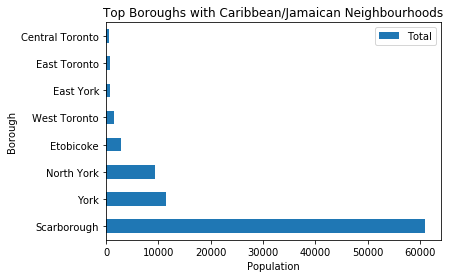

In [18]:
top_borough.plot(kind='barh',x='Borough',y='Total')
plt.title('Top Boroughs with Caribbean/Jamaican Neighbourhoods')
plt.xlabel('Population')
plt.ylabel('Borough')

In [19]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [20]:
# create map of Caribbean neighbourhoods in Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(jam_neigh['LATITUDE'], jam_neigh['LONGITUDE'], jam_neigh['Borough'], jam_neigh['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [21]:
#Foursqare credentials
CLIENT_ID = 'XBNNW4R3SR4GQYOTO4EKWH33YOOSXM0APXYBR1TO33E02LME' # your Foursquare ID
CLIENT_SECRET = 'UXIH0CF0FRIHVAOYYAW54ILDPD4ERFI34QIFCWOEG2Y33O5G' # your Foursquare Secret
VERSION = '20200301' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)



Your credentails:
CLIENT_ID: XBNNW4R3SR4GQYOTO4EKWH33YOOSXM0APXYBR1TO33E02LME
CLIENT_SECRET:UXIH0CF0FRIHVAOYYAW54ILDPD4ERFI34QIFCWOEG2Y33O5G


In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
LIMIT = 100
toronto_venues = getNearbyVenues(names=jam_neigh['Neighbourhood'],
                                   latitudes=jam_neigh['LATITUDE'],
                                   longitudes=jam_neigh['LONGITUDE']
                                  )


Malvern
Rouge
Woburn
West Hill
Weston
Mount Dennis
Morningside
Scarborough Village
Dorset Park
Highland Creek
Humber Summit
Agincourt North
Kennedy Park
Victoria Village
Ionview
Milliken
Cliffcrest
Oakridge
New Toronto
Flemingdon Park
Humewood-Cedarvale
Guildwood
Henry Farm
Bayview Village
Roncesvalles
Thorncliffe Park
Hillcrest Village
Long Branch
The Beaches
Bathurst Manor
Little Portugal
Forest Hill North
Alderwood
Markland Wood
Willowdale West


In [24]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Beer Bar,Beer Store,Big Box Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Butcher,Café,Campground,Cantonese Restaurant,Caribbean Restaurant,Castle,Caucasian Restaurant,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Hardware Store,Health Food Store,Historic Site,History Museum,Hockey Arena,Hong Kong Restaurant,Hostel,Hotel,Hotpot Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Liquor Store,Malay Restaurant,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Museum,Music School,Music Store,Nail Salon,National Park,Neighborhood,New American Restaurant,Noodle House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Rock Climbing Spot,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Ski Chalet,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Malvern,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Malvern,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Malvern,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [25]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').sum().reset_index()
toronto_grouped.head()



,Neighbourhood,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Beer Bar,Beer Store,Big Box Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Butcher,Café,Campground,Cantonese Restaurant,Caribbean Restaurant,Castle,Caucasian Restaurant,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Hardware Store,Health Food Store,Historic Site,History Museum,Hockey Arena,Hong Kong Restaurant,Hostel,Hotel,Hotpot Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Liquor Store,Malay Restaurant,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Museum,Music School,Music Store,Nail Salon,National Park,Neighborhood,New American Restaurant,Noodle House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Rock Climbing Spot,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Ski Chalet,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Agincourt North,0,0,0,0,0,1,2,0,0,0,1,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,4,2,1,0,0,0,1,5,0,0,10,1,0,2,0,3,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,2,2,0,0,0,0,0,1,0,1,1,0,1,4,0,0,1,1,0,1,0,0,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,1,0,0,0,1,3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,3,2,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0
1,Alderwood,0,0,0,0,0,1,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,1,0,0,0,0,3,2,0,0,0,3,3,0,3,0,0,0,0,0,1,0,1,0,1,5,0,0,0,0,0,1,0,0,1,2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,1,0,3,0,1,0,1,0,0,0,1,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,1,1,0,1,0,0,0,2,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,1,3,0,0,1,1,0,1,0,0,0,0,3,0,0,1,0,0,3,0,1,0,1,0,0,0,0,0,1,1,2,0,0,0,0,1,2,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,2,0,0
2,Bathurst Manor,0,1,0,0,0,0,0,1,1,0,0,2,0,0,0,0,0,

In [26]:
carib_rest = toronto_grouped[['Neighbourhood','Caribbean Restaurant']]
carib_rest.sort_values(by=['Caribbean Restaurant'], inplace=True, ascending=False)
carib_rest.head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Neighbourhood,Caribbean Restaurant
0,Agincourt North,5
9,Henry Farm,4
21,Morningside,4
20,Milliken,4
18,Malvern,4
34,Woburn,4
5,Dorset Park,4
3,Bayview Village,3
11,Hillcrest Village,3
12,Humber Summit,2


In [27]:
carib = pd.merge(popul7, carib_rest, on='Neighbourhood')
carib.head(10)

,Neighbourhood Number,Neighbourhood,Total,Percentage,Borough,Caribbean Restaurant
0,132.0,Malvern,11375.0,0.42,Scarborough,4
1,131.0,Rouge,10195.0,0.37,Scarborough,1
2,137.0,Woburn,7635.0,0.28,Scarborough,4
3,136.0,West Hill,7125.0,0.26,Scarborough,0
4,113.0,Weston,6100.0,0.22,York,0
5,115.0,Mount Dennis,4310.0,0.16,York,1
6,135.0,Morningside,3855.0,0.14,Scarborough,4
7,139.0,Scarborough Village,3585.0,0.13,Scarborough,1
8,126.0,Dorset Park,2855.0,0.10,Scarborough,4
9,134.0,Highland Creek,2455.0,0.09,Scarborough,0


In [28]:
carib.sort_values(by=['Caribbean Restaurant'], inplace=True, ascending=False)
carib.head(10)

,Neighbourhood Number,Neighbourhood,Total,Percentage,Borough,Caribbean Restaurant
11,129.0,Agincourt North,2295.0,0.08,Scarborough,5
0,132.0,Malvern,11375.0,0.42,Scarborough,4
15,130.0,Milliken,1575.0,0.06,Scarborough,4
2,137.0,Woburn,7635.0,0.28,Scarborough,4
6,135.0,Morningside,3855.0,0.14,Scarborough,4
22,53.0,Henry Farm,940.0,0.03,North York,4
8,126.0,Dorset Park,2855.0,0.10,Scarborough,4
26,48.0,Hillcrest Village,715.0,0.03,North York,3
23,52.0,Bayview Village,905.0,0.03,North York,3
10,21.0,Humber Summit,2315.0,0.08,North York,2


Text(0, 0.5, 'Neighbourhood')

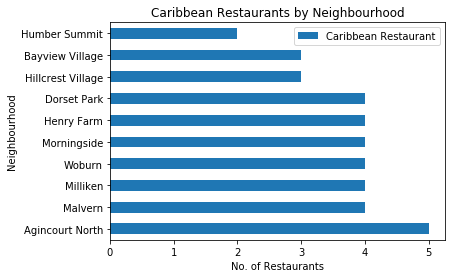

In [29]:
carib_top = carib.head(10)
carib_top.plot(kind='barh',x='Neighbourhood',y='Caribbean Restaurant')
plt.title('Caribbean Restaurants by Neighbourhood')
plt.xlabel('No. of Restaurants')
plt.ylabel('Neighbourhood')

In [31]:
rest_by_borough = carib.groupby('Borough').sum().reset_index()
rest_by_borough2 = rest_by_borough[['Borough', 'Caribbean Restaurant']]
rest_by_borough2.sort_values(by=['Caribbean Restaurant'], inplace=True, ascending=False)
rest_by_borough2

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Borough,Caribbean Restaurant
5,Scarborough,30
4,North York,14
7,York,2
6,West Toronto,1
0,Central Toronto,0
1,East Toronto,0
2,East York,0
3,Etobicoke,0


Text(0, 0.5, 'Borough')

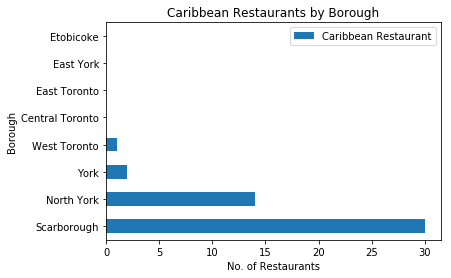

In [86]:
rest_by_borough2.plot(kind='barh',x='Borough',y='Caribbean Restaurant')
plt.title('Caribbean Restaurants by Borough')
plt.xlabel('No. of Restaurants')
plt.ylabel('Borough')

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)


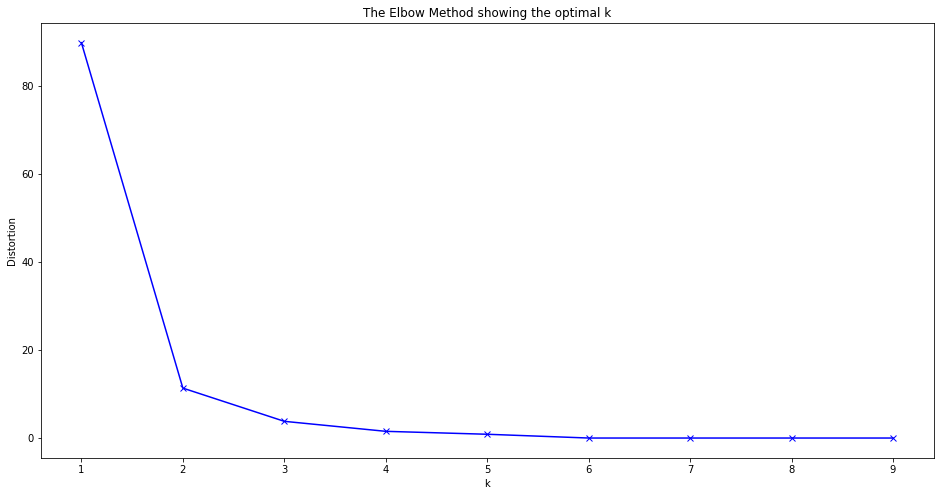

In [32]:
carib_rest_clustering = carib_rest.drop('Neighbourhood', 1)

distortions = []
K = range(1,10)
for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(carib_rest_clustering)
        distortions.append(kmeanModel.inertia_)
        
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#carib_rest_clustering = carib_rest.drop('Neighbourhood', 1)

#error_cost=[]

#for i in range (3,11):
    #KM = KMeans(n_clusters=i, max_iter=100)
   # try:
  #      KM.fit(carib_rest_clustering)
 #   except ValueError:
       # print ("error in line i")
        
#error_cost.append(KM.inertia_/100)
#plt.plot(range(3,11), error_cost, color='b', linewidth='3')
#plt.xlabel('K Values')
#plt.ylabel('Squared Error')
#plt.show()


In [33]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(carib_rest_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2], dtype=int32)

In [34]:
# add clustering labels
carib.insert(0, 'Cluster Labels', kmeans.labels_)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
carib_all = pd.merge(jam_neigh,carib, on='Neighbourhood Number').reset_index()

carib_all.head() 

,index,Neighbourhood Number,Neighbourhood_x,Total_x,Percentage_x,Borough_x,AREA_NAME,LONGITUDE,LATITUDE,Cluster Labels,Neighbourhood_y,Total_y,Percentage_y,Borough_y,Caribbean Restaurant
0,0,132.0,Malvern,11375.0,0.42,Scarborough,Malvern (132),-79.222517,43.803658,0,Malvern,11375.0,0.42,Scarborough,4
1,1,131.0,Rouge,10195.0,0.37,Scarborough,Rouge (131),-79.186343,43.821201,2,Rouge,10195.0,0.37,Scarborough,1
2,2,137.0,Woburn,7635.0,0.28,Scarborough,Woburn (137),-79.228586,43.766740,0,Woburn,7635.0,0.28,Scarborough,4
3,3,136.0,West Hill,7125.0,0.26,Scarborough,West Hill (136),-79.176676,43.767490,1,West Hill,7125.0,0.26,Scarborough,0
4,4,113.0,Weston,6100.0,0.22,York,Weston (113),-79.515723,43.702716,1,Weston,6100.0,0.22,York,0


In [35]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(carib_all['LATITUDE'], carib_all['LONGITUDE'], carib_all['Neighbourhood_x'], carib_all['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [66]:
carib_all.loc[carib_all['Cluster Labels'] == 0, carib_all.columns[[1] + list(range(5, carib_all.shape[1]))]]

,Neighbourhood Number,Postcode_x,Borough_x,AREA_NAME,LONGITUDE,LATITUDE,Cluster Labels,Neighbourhood_y,Total_y,Postcode_y,Borough_y,Caribbean Restaurant
0,132.0,M1B,Scarborough,Malvern (132),-79.222517,43.803658,0,Malvern,0.42,M1B,Scarborough,4
2,137.0,M1G,Scarborough,Woburn (137),-79.228586,43.766740,0,Woburn,0.28,M1G,Scarborough,4
6,135.0,M1E,Scarborough,Morningside (135),-79.207041,43.782399,0,Morningside,0.14,M1E,Scarborough,4
8,126.0,M1P,Scarborough,Dorset Park (126),-79.278908,43.759274,0,Dorset Park,0.10,M1P,Scarborough,4
11,129.0,M1V,Scarborough,Agincourt North (129),-79.266712,43.805441,0,Agincourt North,0.08,M1V,Scarborough,5
15,130.0,M1V,Scarborough,Milliken (130),-79.275009,43.820691,0,Milliken,0.06,M1V,Scarborough,4
22,53.0,M2J,North York,Henry Farm (53),-79.341241,43.771144,0,Henry Farm,0.03,M2J,North York,4
23,52.0,M2K,North York,Bayview Village (52),-79.377117,43.776361,0,Bayview Village,0.03,M2K,North York,3
26,48.0,M2H,North York,Hillcrest Village (48),-79.354804,43.802988,0,Hillcrest Village,0.03,M2H,North York,3


In [67]:
carib_all.loc[carib_all['Cluster Labels'] == 1, carib_all.columns[[1] + list(range(5, carib_all.shape[1]))]]

,Neighbourhood Number,Postcode_x,Borough_x,AREA_NAME,LONGITUDE,LATITUDE,Cluster Labels,Neighbourhood_y,Total_y,Postcode_y,Borough_y,Caribbean Restaurant
3,136.0,M1E,Scarborough,West Hill (136),-79.176676,43.767490,1,West Hill,0.26,M1E,Scarborough,0
4,113.0,M9N,York,Weston (113),-79.515723,43.702716,1,Weston,0.22,M9N,York,0
9,134.0,M1C,Scarborough,Highland Creek (134),-79.177472,43.790775,1,Highland Creek,0.09,M1C,Scarborough,0
12,124.0,M1K,Scarborough,Kennedy Park (124),-79.260382,43.725556,1,Kennedy Park,0.08,M1K,Scarborough,0
16,123.0,M1M,Scarborough,Cliffcrest (123),-79.235530,43.721121,1,Cliffcrest,0.05,M1M,Scarborough,0
18,18.0,M8V,Etobicoke,New Toronto (18),-79.510358,43.600589,1,New Toronto,0.05,M8V,Etobicoke,0
24,86.0,M6R,West Toronto,Roncesvalles (86),-79.442992,43.646123,1,Roncesvalles,0.03,M6R,West Toronto,0
25,55.0,M4H,East York,Thorncliffe Park (55),-79.349984,43.707749,1,Thorncliffe Park,0.03,M4H,East York,0
27,19.0,M8W,Etobicoke,Long Branch (19),-79.533345,43.592362,1,Long Branch,0.03,M8W,Etobicoke,0
28,63.0,M4E,East Toronto,The Beaches (63),-79.299601,43.671050,1,The Beaches,0.03,M4E,East Toronto,0


In [68]:
carib_all.loc[carib_all['Cluster Labels'] == 2, carib_all.columns[[1] + list(range(5, carib_all.shape[1]))]]

,Neighbourhood Number,Postcode_x,Borough_x,AREA_NAME,LONGITUDE,LATITUDE,Cluster Labels,Neighbourhood_y,Total_y,Postcode_y,Borough_y,Caribbean Restaurant
1,131.0,M1B,Scarborough,Rouge (131),-79.186343,43.821201,2,Rouge,0.37,M1B,Scarborough,1
5,115.0,M6M,York,Mount Dennis (115),-79.499989,43.688144,2,Mount Dennis,0.16,M6M,York,1
7,139.0,M1J,Scarborough,Scarborough Village (139),-79.216813,43.738652,2,Scarborough Village,0.13,M1J,Scarborough,1
10,21.0,M9L,North York,Humber Summit (21),-79.556175,43.758920,2,Humber Summit,0.08,M9L,North York,2
13,43.0,M4A,North York,Victoria Village (43),-79.314874,43.728489,2,Victoria Village,0.08,M4A,North York,1
14,125.0,M1K,Scarborough,Ionview (125),-79.272470,43.735364,2,Ionview,0.07,M1K,Scarborough,1
17,121.0,M1L,Scarborough,Oakridge (121),-79.279708,43.697408,2,Oakridge,0.05,M1L,Scarborough,1
19,44.0,M3C,North York,Flemingdon Park (44),-79.332646,43.715930,2,Flemingdon Park,0.05,M3C,North York,1
20,106.0,M6C,York,Humewood-Cedarvale (106),-79.427683,43.691370,2,Humewood-Cedarvale,0.04,M6C,York,1
21,140.0,M1E,Scarborough,Guildwood (140),-79.195055,43.748829,2,Guildwood,0.03,M1E,Scarborough,1
